# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')#loading english language library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:
news_df = pd.read_csv("BBC News Sample Solution.csv")
X_train = pd.read_csv("BBC News Train.csv")

In [3]:
X_train

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
X_train.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


# STEP #2: VISUALIZE DATASET


In [6]:
X_train.groupby('Category').describe()

ArticleId                                                 \
                  count         mean         std   min     25%     50%   
Category                                                                 
business          336.0  1104.315476  658.063510   2.0  476.25  1107.5   
entertainment     273.0  1100.274725  615.695597  10.0  601.00  1081.0   
politics          274.0  1134.317518  637.628980   7.0  610.00  1163.0   
sport             346.0  1104.057803  649.542516   4.0  513.50  1070.0   
tech              261.0  1165.195402  643.852459  20.0  631.00  1147.0   

                                
                   75%     max  
Category                        
business       1716.25  2221.0  
entertainment  1611.00  2223.0  
politics       1681.50  2224.0  
sport          1689.50  2219.0  
tech           1755.00  2216.0

In [7]:
# Let's get the length of the messages
X_train['length'] = X_train['Text'].apply(len)
X_train.head()

,ArticleId,Text,Category,length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
4,917,enron bosses in $168m payout eighteen former e...,business,2190


In [8]:
X_train

,ArticleId,Text,Category,length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
4,917,enron bosses in $168m payout eighteen former e...,business,2190
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1266
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,3111
1487,1590,weak dollar hits reuters revenues at media gro...,business,1370
1488,1587,apple ipod family expands market apple has exp...,tech,3242


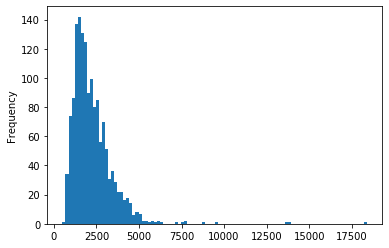

In [9]:
X_train['length'].plot(bins=100, kind='hist') 

In [10]:
X_train.length.describe()

count     1490.000000
mean      2233.461745
std       1205.153358
min        501.000000
25%       1453.000000
50%       1961.000000
75%       2751.250000
max      18387.000000
Name: length, dtype: float64

In [11]:
# Let's divide the text into categories
business = X_train[X_train['Category']=='business']

In [12]:
business

,ArticleId,Text,Category,length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
4,917,enron bosses in $168m payout eighteen former e...,business,2190
8,2034,car giant hit by mercedes slump a slump in pro...,business,2609
...,...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business,1655
1479,2058,high fuel costs hit us airlines two of the lar...,business,1835
1480,1124,qantas sees profits fly to record australian a...,business,1821
1484,1774,hyundai to build new india plant south korea s...,business,1436


In [13]:
entertainment = X_train[X_train['Category']=='entertainment']
entertainment

,ArticleId,Text,Category,length
7,1797,french honour for director parker british film...,entertainment,1342
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1368
11,1153,housewives lift channel 4 ratings the debut of...,entertainment,1177
16,342,u2 s desire to be number one u2 who have won ...,entertainment,4808
21,177,carry on star patsy rowlands dies actress pats...,entertainment,1874
...,...,...,...,...
1462,605,da vinci code is lousy history the plot of a...,entertainment,1970
1476,783,bollywood draws global stars british actress a...,entertainment,2996
1483,1904,beastie boys win sampling battle us rappers be...,entertainment,1455
1485,857,double eviction from big brother model caprice...,entertainment,1266


In [14]:
politics = X_train[X_train['Category']=='politics']
politics

,ArticleId,Text,Category,length
5,1582,howard truanted to play snooker conservative...,politics,1588
10,1683,blair rejects iraq advice calls tony blair has...,politics,3366
28,1527,uk will stand firm on eu rebate britain s £3b...,politics,1653
33,2100,security papers found in street an inquiry i...,politics,1226
52,1763,mps quiz aides over royal income senior offici...,politics,1334
...,...,...,...,...
1456,955,blair told to double overseas aid tony blair i...,politics,2632
1463,2102,abbas will not tolerate attacks palestinian ...,politics,2112
1472,1806,kelly trails new discipline power teachers cou...,politics,3171
1475,980,budget to set scene for election gordon brown ...,politics,3121


In [15]:
tech = X_train[X_train['Category']=='tech']
tech

,ArticleId,Text,Category,length
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
19,1552,moving mobile improves golf swing a mobile pho...,tech,1532
24,405,bt boosts its broadband packages british telec...,tech,2025
26,702,peer-to-peer nets here to stay peer-to-peer ...,tech,4950
30,1951,pompeii gets digital make-over the old-fashion...,tech,2502
...,...,...,...,...
1469,1819,warnings on woeful wi-fi security companies ar...,tech,2382
1477,883,web logs aid disaster recovery some of the mos...,tech,3952
1482,1880,file-swappers ready new network legal attacks ...,tech,4122
1488,1587,apple ipod family expands market apple has exp...,tech,3242


In [16]:
sport = X_train[X_train['Category']=='sport']
sport

,ArticleId,Text,Category,length
6,651,wales silent on grand slam talk rhys williams ...,sport,1988
14,707,ireland 21-19 argentina an injury-time dropped...,sport,2388
15,1588,wenger signs new deal arsenal manager arsene w...,sport,1656
17,486,hantuchova in dubai last eight daniela hantuch...,sport,1600
18,1344,melzer shocks agassi in san jose second seed a...,sport,1146
...,...,...,...,...
1467,937,charvis set to lose fitness bid flanker colin ...,sport,1239
1468,454,preview: ireland v england (sun) lansdowne roa...,sport,3009
1471,1870,ferrero eyes return to top form former world n...,sport,2309
1473,304,dallaglio eyeing lions tour place former engla...,sport,1217


# TO REMOVE STOPWORDS,PUNCTUATIONS

In [17]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import string
string.punctuation
from nltk.corpus import stopwords
stopwords.words('english')

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [18]:
# Let's test the newly added function
X_train['Text'].apply(message_cleaning)

0       [worldcom, exboss, launches, defence, lawyers,...
1       [german, business, confidence, slides, german,...
2       [bbc, poll, indicates, economic, gloom, citize...
3       [lifestyle, governs, mobile, choice, faster, b...
4       [enron, bosses, 168m, payout, eighteen, former...
                              ...                        
1485    [double, eviction, big, brother, model, capric...
1486    [dj, double, act, revamp, chart, show, dj, duo...
1487    [weak, dollar, hits, reuters, revenues, media,...
1488    [apple, ipod, family, expands, market, apple, ...
1489    [santy, worm, makes, unwelcome, visit, thousan...
Name: Text, Length: 1490, dtype: object

# LET'S APPLY COUNT VECTORIZER TO OUR MESSAGES LIST

In [19]:
# Define the cleaning pipeline we defined earlier
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
countvectorizer = vectorizer.fit_transform(X_train['Text'])


In [20]:
print(vectorizer.get_feature_names())


['00', '000', '0001', '00051', '000acre', '000ayear', '000bn', '000m', '000seater', '000strong', '000th', '000vote', '001', '001and', '001st', '003', '004secs', '007', '01', '0100', '0130', '019secs', '02', '024', '025', '027', '028', '03', '030', '033', '04', '040', '0400', '041', '05', '0501', '050505', '0530', '0530gmt', '056', '06', '060', '0605', '0630', '07', '070', '0700', '0708', '0710', '072', '0730', '08', '080', '0800', '0845', '0870', '088', '089', '09', '090', '0900', '093', '0950', '099', '1', '10', '100', '1000m', '1000th', '100120', '1004secs', '1008', '100bn', '100m', '100ml', '100mshare', '101', '1012', '1013', '1015', '1016', '1019', '102', '1020', '10216bn', '1022', '1025', '10255', '1025m', '1026bn', '1028bn', '102975', '102bn', '102inch', '103', '103m', '104', '10416', '1044', '10453', '10476', '1048', '104bn', '105', '10517', '10528', '105bn', '106', '106km', '106m', '106m£546m', '107', '107bn', '107m', '108', '1080', '1085m', '109', '109bn', '10bn', '10day', '10

In [21]:
print(countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [22]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = X_train['Category'].values
NB_classifier.fitcountvectorizer, label)

SyntaxError: invalid syntax (<ipython-input-22-0283e9be2496>, line 5)

In [ ]:
testing_sample = pd.read_csv('BBC News Test.csv')
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [ ]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

# STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [ ]:
X = countvectorizer
y = label

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

# STEP#5: EVALUATING THE MODEL 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))